In [23]:
# Import necessary packages
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np
from soundfile import write
import math
import warnings
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import  GaussianMixture
from sklearn.decomposition import PCA

In [13]:
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

songs = [
    '/home/joe/Music/Playlist/Beach Fossils/Somersault/09 Down the Line.m4a',
    '/home/joe/Music/Playlist/Big Thief/Capacity/02 Shark Smile.m4a',
    '/home/joe/Music/Playlist/Blue Rain Boots/Good Old Days/01 Good Old Days.m4a',
    '/home/joe/Music/Playlist/Blue Rain Boots/River (Acoustic)/01 River (Acoustic).m4a',
    '/home/joe/Music/Playlist/Bon Iver/Blood Bank/01 Blood Bank.m4a',
    '/home/joe/Music/Playlist/Bon Iver/For Emma, Forever Ago/03 Skinny Love.m4a',
    '/home/joe/Music/Playlist/Briston Maroney/Indiana/02 Caroline.m4a',
    '/home/joe/Music/Playlist/Cage the Elephant/Thank You Happy Birthday/02 Aberdeen.m4a',
    '/home/joe/Music/Playlist/Clairo/Immunity/05 Bags.m4a',
    '/home/joe/Music/Playlist/Del Water Gap/1 (646) 943 2672 (Extended Play)/02 Let\'s Pretend.m4a',
    '/home/joe/Music/Playlist/Del Water Gap/1 (646) 943 2672 (Extended Play)/04 High Tops.m4a',
    '/home/joe/Music/Playlist/Flipturn/Citrona/02 Six Below.m4a',
    '/home/joe/Music/Playlist/Flipturn/Citrona/07 Nickel.m4a',
    '/home/joe/Music/Playlist/Grouplove/Spreading Rumours (Deluxe)/12 Raspberry.m4a',
    '/home/joe/Music/Playlist/Hop Along/Painted Shut/01 The Knock.m4a',
    '/home/joe/Music/Playlist/Hop Along/Painted Shut/03 Horseshoe Crabs.m4a',
    '/home/joe/Music/Playlist/illuminati hotties/Kiss Yr Frenemies/03 Shape of My Hands.m4a',
    '/home/joe/Music/Playlist/Jelani Aryeh/I\'ve Got Some Living To Do/07 Stella Brown.m4a',
    '/home/joe/Music/Playlist/joe p/Emily Can\'t Sing/02 Fighting in the Car.m4a',
    '/home/joe/Music/Playlist/Modern Baseball/Sports/08 Cooke.m4a',
    '/home/joe/Music/Playlist/Phoebe Bridgers/Punisher/03 Kyoto.m4a',
    '/home/joe/Music/Playlist/Phoebe Bridgers/Stranger in the Alps/02 Motion Sickness.m4a',
    '/home/joe/Music/Playlist/Rainbow Kitten Surprise/Rks/07 Cocaine Jesus.m4a',
    '/home/joe/Music/Playlist/Rainbow Kitten Surprise/Seven + Mary/03 First Class.m4a',
    '/home/joe/Music/Playlist/Rainbow Kitten Surprise/Seven + Mary/06 Devil Like Me.m4a',
    '/home/joe/Music/Playlist/Ratboys/GN/02 Elvis Is in the Freezer.m4a',
    '/home/joe/Music/Playlist/Ritt Momney/Young Adult/01 Young Adult.m4a',
    '/home/joe/Music/Playlist/Said The Whale/Islands Disappear/04 Camilo - The Magician.m4a',
    '/home/joe/Music/Playlist/Shakey Graves/And the War Came/03 Dearly Departed.m4a',
    '/home/joe/Music/Playlist/Soccer Mommy/Clean/03 Your Dog.m4a',
    '/home/joe/Music/Playlist/Surf Curse/Sad Boys/03 I\'m Not Making out With You.m4a',
    '/home/joe/Music/Playlist/The Backseat Lovers/Elevator Days/01 Out of Tune.m4a',
    '/home/joe/Music/Playlist/The Backseat Lovers/Elevator Days/04 Elevator Days.m4a',
    '/home/joe/Music/Playlist/The Backseat Lovers/When We Were Friends/01 Watch Your Mouth.m4a',
    '/home/joe/Music/Playlist/The Buttertones/Buttertones/01 Dionysus.m4a',
    '/home/joe/Music/Playlist/the moss/Bryology/02 Duele Más.m4a',
    '/home/joe/Music/Playlist/the moss/Kentucky Derby/01 Secretariat.m4a',
    '/home/joe/Music/Playlist/The Strokes/Is This It/01 Is This It.m4a',
    '/home/joe/Music/Playlist/The Tallest Man On Earth/Shallow Grave/06 The Gardener.m4a',
    '/home/joe/Music/Playlist/The World Is A Beautiful Place & I Am No Longer Afraid To Die/Harmlessness/04 The Word Lisa.m4a',
    '/home/joe/Music/Playlist/Wallows/Drunk on Halloween/01 Drunk on Halloween.m4a',
    '/home/joe/Music/Playlist/Waxahatchee/Saint Cloud/04 Lilacs.m4a',
    '/home/joe/Music/Playlist/WILLIS/Locals 2/05 I Think I Like When It Rains.m4a',
    '/home/joe/Music/Playlist/Your Neighbors/Bodega/01 Bodega.m4a',
]

In [18]:
def summarize(song):
    y, sr = librosa.load(song)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return np.concatenate(([chroma_stft.mean(), rmse.mean(), spec_cent.mean(), spec_bw.mean(), rolloff.mean(), zcr.mean()], mfcc.mean(axis=1)))

In [ ]:
songSummaries = np.array([summarize(x) for x in songs])
songs = [x[x.rindex('/')+4:] for x in songs]

In [19]:
#scaledSummaries = np.array([Standardize(x) for x in songSummaries])

scaler = StandardScaler().fit(songSummaries)
scaledSummaries = scaler.transform(songSummaries)

In [37]:
pca = PCA(svd_solver='full')
pca.fit(scaledSummaries)
decompSummaries = pca.transform(scaledSummaries)

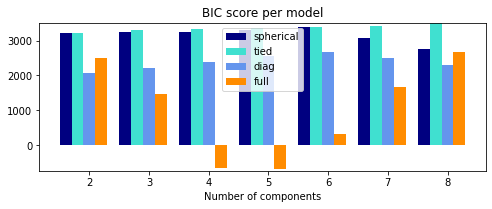

In [57]:
lowest_bic = np.infty
bic = []
n_components_range = range(2, 9)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(
            n_components=n_components, covariance_type=cv_type, random_state=1
        )
        gmm.fit(decompSummaries)
        bic.append(gmm.bic(decompSummaries))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)

In [55]:
Y_ = clf.predict(decompSummaries)

In [56]:
predSongs = np.array([[songs[x], Y_[x]] for x in range(len(songs))])
for attr in np.unique(Y_):
    print(attr)
    print(predSongs[predSongs[:,1]==str(attr)][:,0])

0
['River (Acoustic).m4a' 'Skinny Love.m4a' 'Young Adult.m4a'
 'Elevator Days.m4a' 'Is This It.m4a' 'The Gardener.m4a']
1
['Shark Smile.m4a' 'Blood Bank.m4a' 'Caroline.m4a' 'Nickel.m4a'
 'Kyoto.m4a' 'Motion Sickness.m4a' 'Watch Your Mouth.m4a' 'Lilacs.m4a']
2
['Raspberry.m4a' 'Fighting in the Car.m4a' 'Dearly Departed.m4a'
 'Your Dog.m4a' 'Drunk on Halloween.m4a' 'Bodega.m4a']
3
['Aberdeen.m4a' "Let's Pretend.m4a" 'Six Below.m4a' 'The Knock.m4a'
 'Horseshoe Crabs.m4a' 'Shape of My Hands.m4a' 'Stella Brown.m4a'
 'Elvis Is in the Freezer.m4a' 'Camilo - The Magician.m4a'
 'Out of Tune.m4a' 'Duele Más.m4a' 'Secretariat.m4a' 'The Word Lisa.m4a']
4
['Down the Line.m4a' 'Good Old Days.m4a' 'Bags.m4a' 'High Tops.m4a'
 'Cooke.m4a' 'Cocaine Jesus.m4a' 'First Class.m4a' 'Devil Like Me.m4a'
 "I'm Not Making out With You.m4a" 'Dionysus.m4a'
 'I Think I Like When It Rains.m4a']


In [44]:
gmm = GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(decompSummaries)
Y_ = gmm.predict(decompSummaries)

In [45]:
predSongs = np.array([[songs[x], Y_[x]] for x in range(len(songs))])
for attr in np.unique(Y_):
    print(attr)
    print(predSongs[predSongs[:,1]==str(attr)][:,0])

0
['Down the Line.m4a' 'Aberdeen.m4a' 'Six Below.m4a' 'Raspberry.m4a'
 'The Knock.m4a' 'Horseshoe Crabs.m4a' 'Shape of My Hands.m4a'
 'Camilo - The Magician.m4a' 'Dearly Departed.m4a' 'Your Dog.m4a'
 'Drunk on Halloween.m4a']
1
['Shark Smile.m4a' 'Blood Bank.m4a' 'Caroline.m4a' 'Bags.m4a' 'Nickel.m4a'
 'Kyoto.m4a' 'Motion Sickness.m4a' 'Elvis Is in the Freezer.m4a'
 'Lilacs.m4a']
2
['Good Old Days.m4a' 'Cocaine Jesus.m4a' 'First Class.m4a'
 'Devil Like Me.m4a' 'I Think I Like When It Rains.m4a']
3
['River (Acoustic).m4a' 'Skinny Love.m4a' 'Is This It.m4a'
 'The Gardener.m4a']
4
["Let's Pretend.m4a" 'High Tops.m4a' 'Stella Brown.m4a'
 'Fighting in the Car.m4a' 'Cooke.m4a' 'Young Adult.m4a'
 "I'm Not Making out With You.m4a" 'Out of Tune.m4a' 'Elevator Days.m4a'
 'Watch Your Mouth.m4a' 'Dionysus.m4a' 'Duele Más.m4a' 'Secretariat.m4a'
 'The Word Lisa.m4a' 'Bodega.m4a']
